<a href="https://colab.research.google.com/github/Mehranmollanorozi/KNN/blob/main/KNN___Diabetesss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score, KFold

In [2]:
df = pd.read_csv('/content/diabetes.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
X = df.drop(['Outcome'], axis = 1)
y = df['Outcome']

In [11]:
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

In [13]:
X_train , X_test , y_train , y_test = train_test_split(X_scaled , y , test_size = 0.2 , random_state=42)

In [15]:
K = 100
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=100)

In [16]:
y_pred = knn.predict(X_test)

In [18]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[93  6]
 [29 26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.94      0.84        99
           1       0.81      0.47      0.60        55

    accuracy                           0.77       154
   macro avg       0.79      0.71      0.72       154
weighted avg       0.78      0.77      0.75       154



In [19]:
# 10. Cross Validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(knn, X_scaled, y, cv=cv, scoring='accuracy')
print(f"Cross Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")

Cross Validation Scores: [0.77272727 0.74675325 0.69480519 0.77777778 0.71895425]
Mean CV Accuracy: 0.74


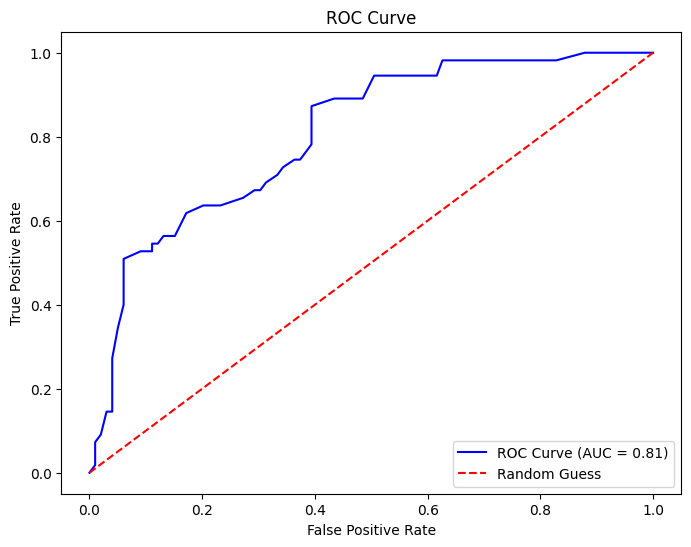

In [20]:

y_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()